# Challenge FIAP 2024 | 1TSCPV-2024
## Grupo DataStorm
#### Ana Beatriz Azevedo RM 557420
#### Heloiza Oliveira RM 558881
#### Isabelle Nahas RM 557405
#### Matheus Madrid RM 555799
#### Sara Sitta RM 555113

# Nesta fase, vamos usar a tabela final da camada REFINED para testar o melhor modelo preditivo de interrupção de energia. Usaremos 4 modelos:

*   Árvore de Decisão (DecisionTree Classifier)
*   Random Forest (Random Forest Classifier)
*   Gradient boosting (XGBClassifier)
*   Gradient boosting (LightGBM)

    ### Os hiperparâmetro serão ajustados com o Grid Search





# Bibliotecas, gráficos e importações iniciais

In [ ]:
pip install scikit-learn


In [ ]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Importações de bibliotecas padrão do Python
import os
import random
import sys
import warnings

# Importações de bibliotecas de terceiros
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier



from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split  # Para dividir os dados em treino e teste
from sklearn.tree import DecisionTreeClassifier  # Para criar o modelo da árvore de decisão
from sklearn import metrics  # Para avaliar o modelo

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    pairwise_distances,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
df = pd.read_csv('C:/Users/anabe/Documents/FIAP/Challenge/Arquitetura Final/REFINED/DF_REFINED.csv')


In [ ]:
# Garantir a coversão da coluna de data
# Depois confirmar se coluna data foi convertida corretamente
df['DATA'] = pd.to_datetime(df['DATA'], errors='coerce')
df['DATA'] = df['DATA'].dt.strftime('%Y-%m-%d')
df['DATA']
df['DATA'] = pd.to_datetime(df['DATA'], errors='coerce')
if pd.api.types.is_datetime64_any_dtype(df['DATA']):
    print("A coluna está no formato datetime.")
else:
    print("A coluna não está no formato datetime.")
df['DATA']

A coluna está no formato datetime.


0       2022-01-01
1       2022-01-09
2       2022-01-11
3       2022-01-13
4       2022-01-16
           ...    
55955   2024-03-09
55956   2024-03-09
55957   2024-03-09
55958   2024-03-09
55959   2024-03-09
Name: DATA, Length: 55960, dtype: datetime64[ns]

In [ ]:
df

,SUB,DATA,ALAGAMENTO_x,INTERRUPCOES,QUEDA DE ARVORE,IndiceDePluviometria,Tem Max,Tem Min,UR
0,AD,2022-01-01,0,0,0,5.5,28.90,17.9,54.90
1,AD,2022-01-09,0,0,0,17.0,19.80,15.9,87.70
2,AD,2022-01-11,0,0,0,35.8,25.20,17.9,70.80
3,AD,2022-01-13,0,0,0,5.1,29.80,19.6,60.60
4,AD,2022-01-16,0,0,0,3.9,31.30,19.5,41.60
...,...,...,...,...,...,...,...,...,...
55955,VP,2024-03-09,0,1,0,0.9,31.51,21.2,78.72
55956,VP,2024-03-09,0,1,0,0.9,31.51,21.2,78.72
55957,VP,2024-03-09,0,1,0,0.9,31.51,21.2,78.72
55958,VP,2024-03-09,0,1,0,0.9,31.51,21.2,78.72


In [ ]:
RANDOM_STATE = 42

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def plot_roc_and_confusion(y_true, y_pred, y_pred_proba, model):
    # Cálculo da curva ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    auc = roc_auc_score(y_true, y_pred_proba)

    # Plot da curva ROC
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label='Área sob a ROC = {:.2f}'.format(auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')

    # Cálculo e plot da matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    plt.subplot(1, 2, 2)
    disp.plot(ax=plt.gca())
    plt.title('Matriz de Confusão')

    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.metrics import classification_report

def display_classification_report(y_true, y_pred, model):
    # Gerar o relatório de classificação
    report = classification_report(y_true, y_pred)
    print("Relatório de Classificação:")
    print(report)


In [ ]:
import matplotlib.pyplot as plt

def plot_feature_importance(model, features):
    # Obtendo a importância das características
    importances = model.feature_importances_

    # Criando um DataFrame para facilitar a visualização
    feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

    # Classificando as importâncias
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    # Plotando as importâncias
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
    plt.xlabel('Importância')
    plt.title('Importância das Características')
    plt.gca().invert_yaxis()  # Inverte o eixo y para mostrar a característica mais importante em cima
    plt.show()


# Variáveis de entrada

In [ ]:
# Definindo as variáveis de entrada (X) e a variável alvo (y)
X = df[['Tem Max', 'Tem Min', 'UR', 'IndiceDePluviometria']]
y = df['INTERRUPCOES']

# Dividindo em conjuntos de treino e teste, estratificando pela variável de subprefeitura
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df['SUB'], test_size=0.2, random_state=42)


# 1º Modelo | Decision Tree Classifier

In [ ]:
# Treinando o modelo
model_dtc = DecisionTreeClassifier(random_state=42)
model_dtc.fit(X_train, y_train)

# Fazendo previsões
y_pred = model_dtc.predict(X_test)

# Imprimindo o relatório
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.31      0.40      1472
           1       0.90      0.96      0.93      9720

    accuracy                           0.88     11192
   macro avg       0.73      0.64      0.67     11192
weighted avg       0.86      0.88      0.86     11192



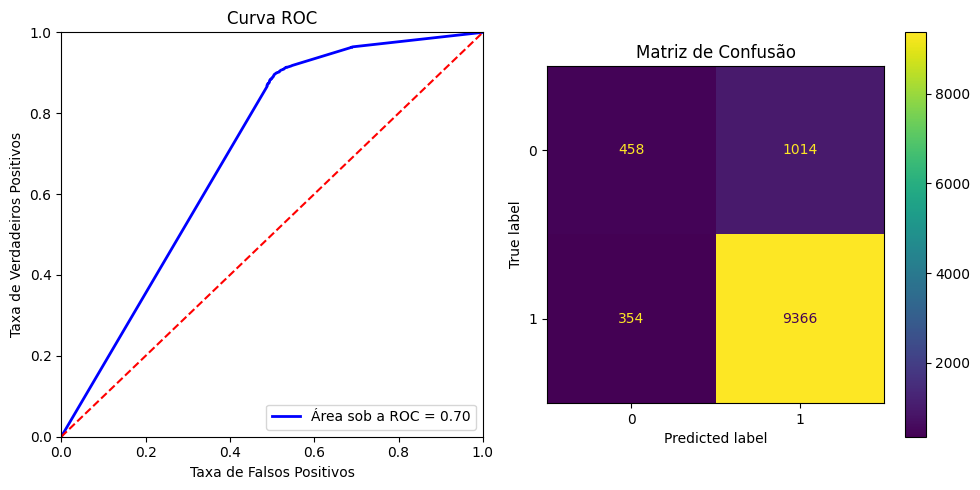

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.56      0.31      0.40      1472
           1       0.90      0.96      0.93      9720

    accuracy                           0.88     11192
   macro avg       0.73      0.64      0.67     11192
weighted avg       0.86      0.88      0.86     11192



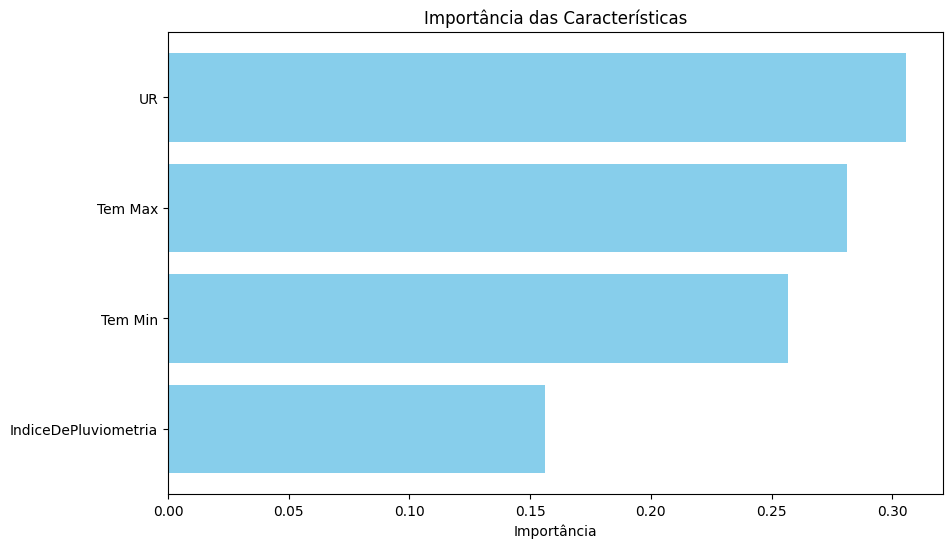

In [ ]:
# Avaliação do Modelo
y_pred_dtc = model_dtc.predict(X_test)
y_pred_proba_dtc = model_dtc.predict_proba(X_test)[:, 1]
threshold = 0.5  # Ajuste o threshold para algo mais moderado
y_pred_adjusted_dtc = (y_pred_proba_dtc >= threshold).astype(int)
# Executar as funções com os dados do modelo
plot_roc_and_confusion(y_test, y_pred_dtc, y_pred_proba_dtc, model_dtc)
display_classification_report(y_test, y_pred_dtc, model_dtc)
plot_feature_importance(model_dtc, X_train.columns)

# 2º Modelo Light GBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


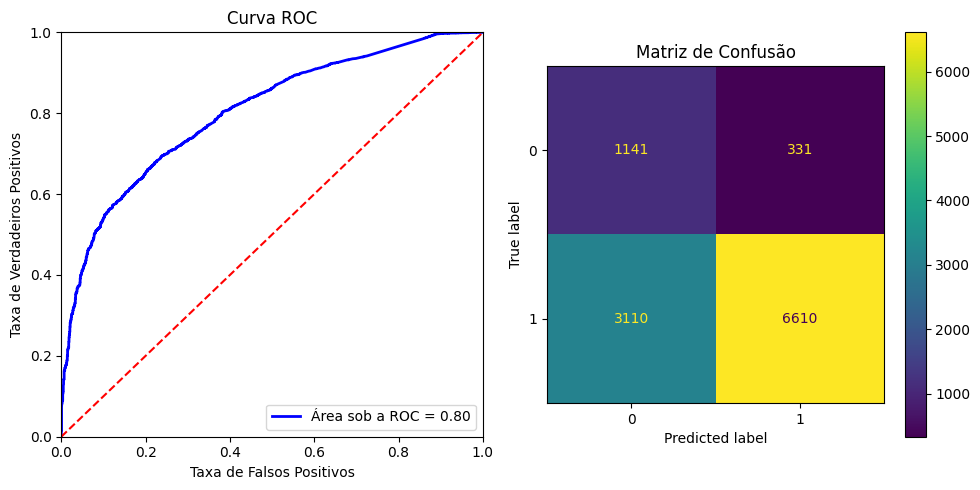

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.27      0.78      0.40      1472
           1       0.95      0.68      0.79      9720

    accuracy                           0.69     11192
   macro avg       0.61      0.73      0.60     11192
weighted avg       0.86      0.69      0.74     11192



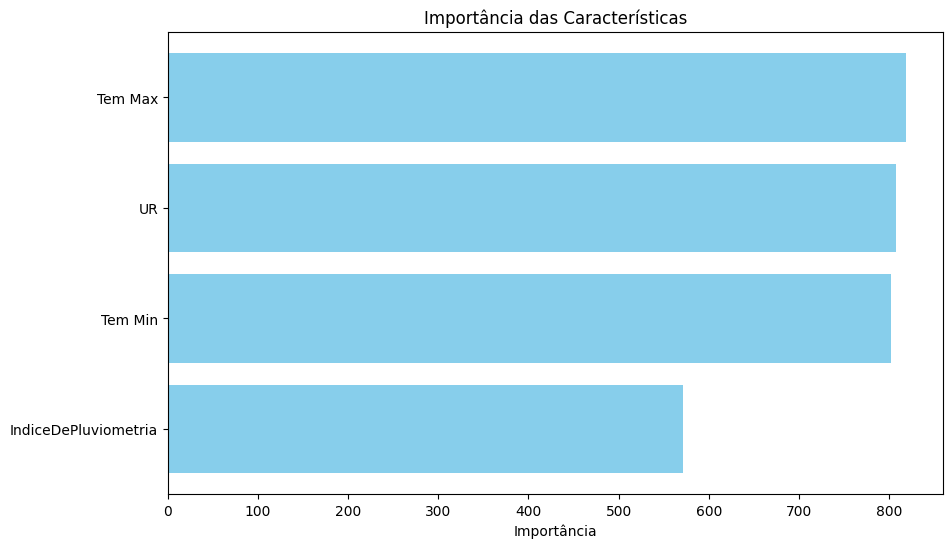

In [ ]:
# Treinando o Modelo LGBM
model_lgb = LGBMClassifier(
    class_weight='balanced',
    random_state=RANDOM_STATE,
    verbosity=0)  # `class_weight='balanced'` lida com desbalanceamento

model_lgb.fit(X_train, y_train)
# Avaliação do Modelo
y_pred_lgb = model_lgb.predict(X_test)
y_pred_proba_lgb = model_lgb.predict_proba(X_test)[:, 1]
threshold = 0.5  # Ajuste o threshold para algo mais moderado
y_pred_adjusted_lgb = (y_pred_proba_lgb >= threshold).astype(int)
# Executar as funções com os dados do modelo
plot_roc_and_confusion(y_test, y_pred_lgb, y_pred_proba_lgb, model_lgb)
display_classification_report(y_test, y_pred_lgb, model_lgb)
plot_feature_importance(model_lgb, X_train.columns)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

model_lgb = LGBMClassifier(
    class_weight='balanced',
    random_state=RANDOM_STATE,
    verbosity=0)  # `class_weight='balanced'` lida com desbalanceamento


# Definindo a grade de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],

}

# Configurando o GridSearchCV
grid_search = GridSearchCV(estimator=model_lgb,
                           param_grid=param_grid,
                           scoring='f1_macro',  # Métrica para avaliação
                           cv=3,  # Validação Cruzada com 3 folds
                           verbose=1,
                           n_jobs=-1)  # Usar todos os processadores

# Executar o GridSearchCV
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Melhor estimador
best_model_lgb = grid_search.best_estimator_

# Fazendo previsões com o melhor modelo
y_pred_lgb_best = best_model_lgb.predict(X_test)

# Imprimindo o relatório
print("Relatório de Classificação para o melhor modelo LGB:")
print(classification_report(y_test, y_pred_lgb_best))


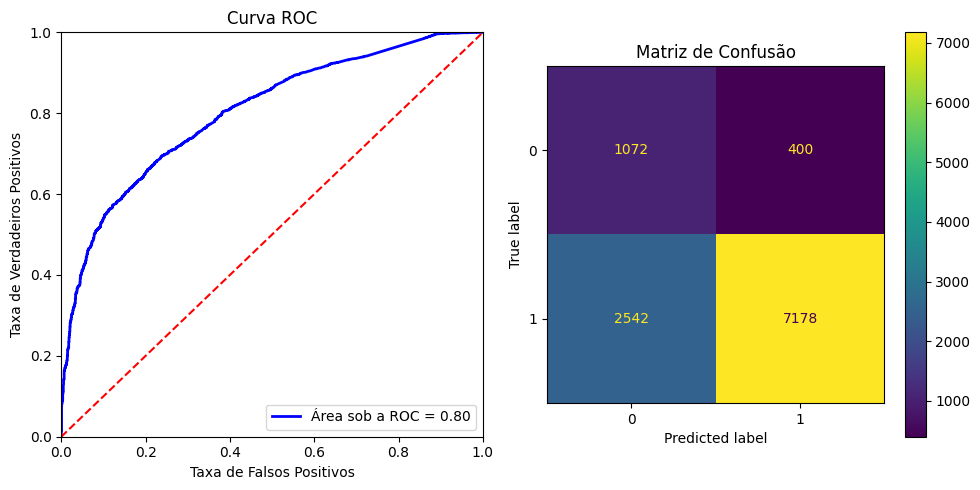

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.30      0.73      0.42      1472
           1       0.95      0.74      0.83      9720

    accuracy                           0.74     11192
   macro avg       0.62      0.73      0.63     11192
weighted avg       0.86      0.74      0.78     11192



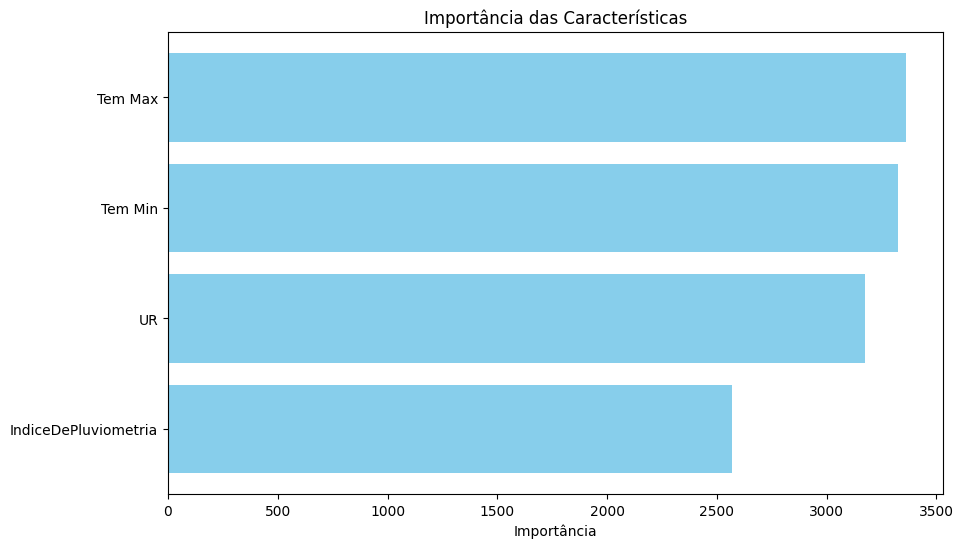

In [ ]:
# Executar as funções com os dados do modelo
plot_roc_and_confusion(y_test, y_pred_lgb_best, y_pred_proba_lgb, best_model_lgb)
display_classification_report(y_test, y_pred_lgb_best, best_model_lgb)
plot_feature_importance(best_model_lgb, X_train.columns)

# 3º Modelo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Definindo o modelo Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Treinando o modelo
model_rf.fit(X_train, y_train)

# Fazendo previsões
y_pred_rf = model_rf.predict(X_test)

# Imprimindo o relatório
print("Relatório de Classificação para Random Forest:")
print(classification_report(y_test, y_pred_rf))


Relatório de Classificação para Random Forest:
              precision    recall  f1-score   support

           0       0.63      0.20      0.30      1472
           1       0.89      0.98      0.93      9720

    accuracy                           0.88     11192
   macro avg       0.76      0.59      0.62     11192
weighted avg       0.86      0.88      0.85     11192



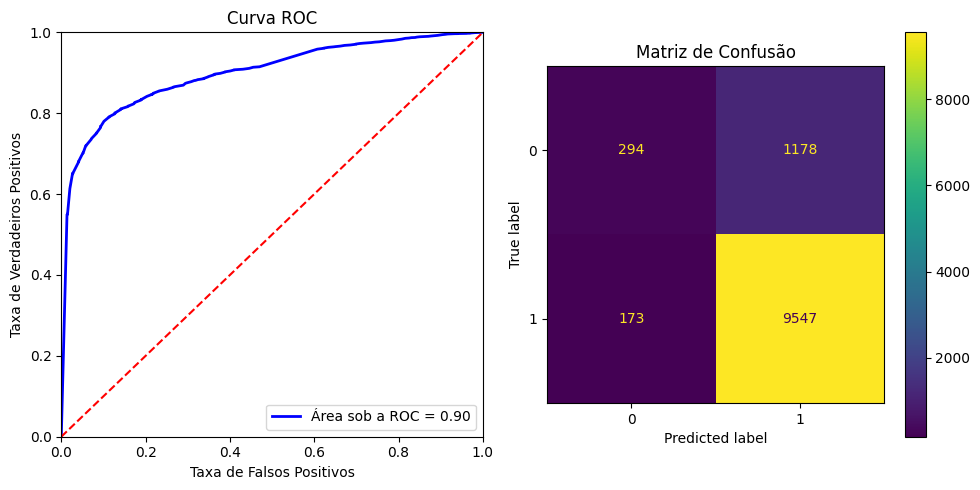

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.63      0.20      0.30      1472
           1       0.89      0.98      0.93      9720

    accuracy                           0.88     11192
   macro avg       0.76      0.59      0.62     11192
weighted avg       0.86      0.88      0.85     11192



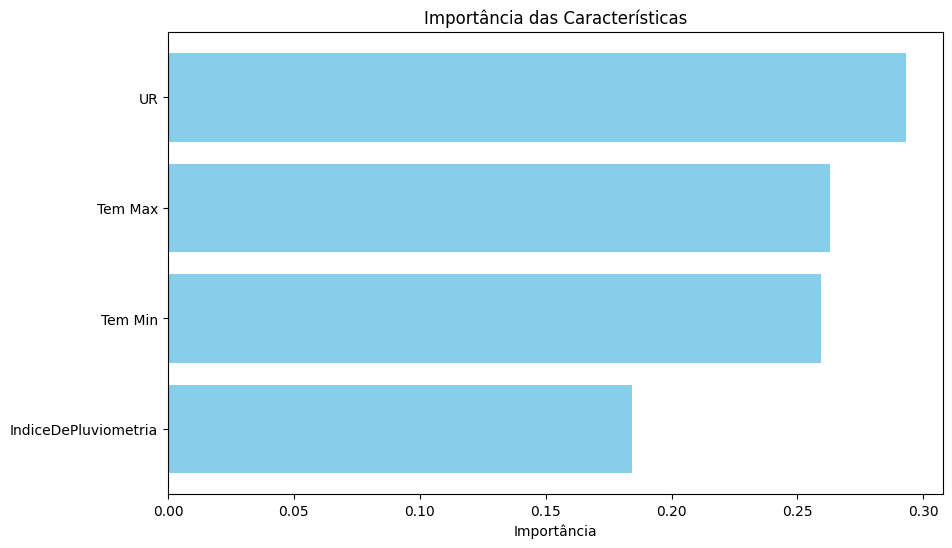

In [ ]:
y_pred_rf = model_rf.predict(X_test)
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]
threshold = 0.5  # Ajuste o threshold para algo mais moderado
y_pred_adjusted_rf = (y_pred_proba_rf >= threshold).astype(int)
# Executar as funções com os dados do modelo
plot_roc_and_confusion(y_test, y_pred_rf, y_pred_proba_rf, model_rf)
display_classification_report(y_test, y_pred_rf, model_rf)
plot_feature_importance(model_rf, X_train.columns)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

model_rf = RandomForestClassifier(random_state=42)

# Definindo a grade de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5],

}

# Configurando o GridSearchCV
grid_search = GridSearchCV(estimator=model_rf,
                           param_grid=param_grid,
                           scoring='f1_macro',  # Métrica para avaliação
                           cv=3,  # Validação Cruzada com 3 folds
                           verbose=1,
                           n_jobs=-1)  # Usar todos os processadores

# Executar o GridSearchCV
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Melhor estimador
best_model_rf = grid_search.best_estimator_

# Fazendo previsões com o melhor modelo
y_pred_rf_best = best_model_rf.predict(X_test)

# Imprimindo o relatório
print("Relatório de Classificação para o melhor modelo LGB:")
print(classification_report(y_test, y_pred_rf_best))


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Melhores parâmetros encontrados:
{'max_depth': 5, 'n_estimators': 500}
Relatório de Classificação para o melhor modelo LGB:
              precision    recall  f1-score   support

           0       0.89      0.04      0.08      1472
           1       0.87      1.00      0.93      9720

    accuracy                           0.87     11192
   macro avg       0.88      0.52      0.51     11192
weighted avg       0.87      0.87      0.82     11192



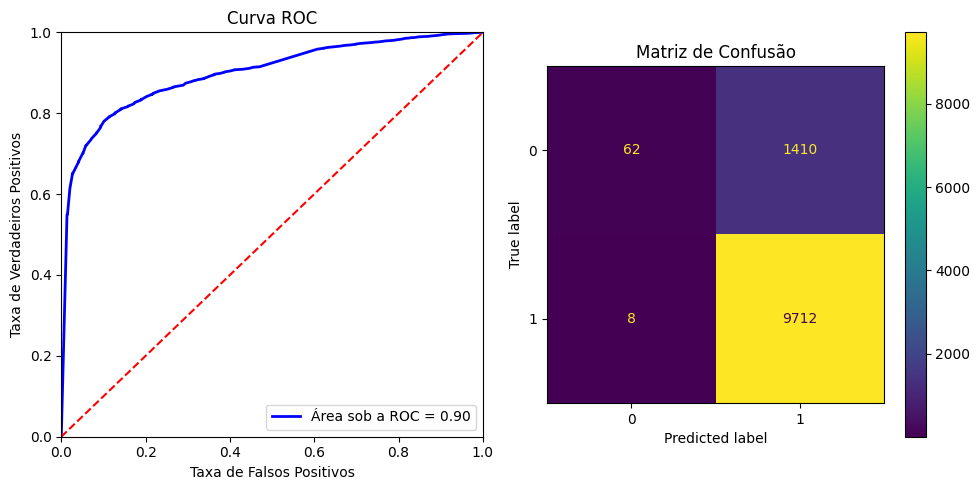

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.04      0.08      1472
           1       0.87      1.00      0.93      9720

    accuracy                           0.87     11192
   macro avg       0.88      0.52      0.51     11192
weighted avg       0.87      0.87      0.82     11192



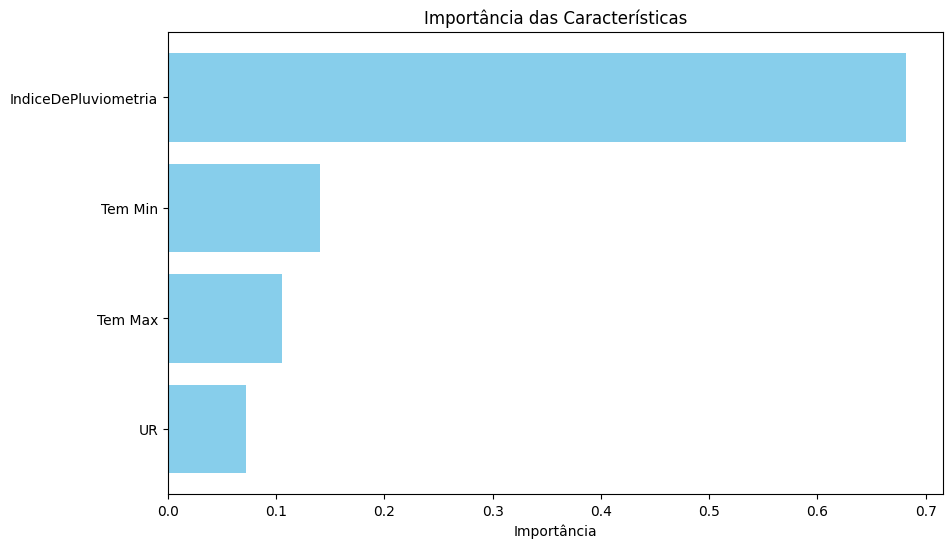

In [ ]:
# Executar as funções com os dados do modelo
plot_roc_and_confusion(y_test, y_pred_rf_best, y_pred_proba_rf, best_model_rf)
display_classification_report(y_test, y_pred_rf_best, best_model_rf)
plot_feature_importance(best_model_rf, X_train.columns)

# 4º Modelo XGBoost

In [ ]:
# Definindo o modelo XGBoost
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Treinando o modelo
model_xgb.fit(X_train, y_train)

# Fazendo previsões
y_pred_xgb = model_xgb.predict(X_test)

# Imprimindo o relatório
print("Relatório de Classificação para XGBoost:")
print(classification_report(y_test, y_pred_xgb))


C:\Users\anabe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:05:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Relatório de Classificação para XGBoost:
              precision    recall  f1-score   support

           0       0.77      0.13      0.22      1472
           1       0.88      0.99      0.94      9720

    accuracy                           0.88     11192
   macro avg       0.82      0.56      0.58     11192
weighted avg       0.87      0.88      0.84     11192



In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

# Definindo o modelo XGBoost
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Definindo a grade de hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Configurando o GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb,
                           param_grid=param_grid,
                           scoring='f1_macro',  # Métrica para avaliação
                           cv=3,  # Validação Cruzada com 3 folds
                           verbose=1,
                           n_jobs=-1)  # Usar todos os processadores

# Executar o GridSearchCV
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Melhor estimador
best_model_xgb = grid_search.best_estimator_

# Fazendo previsões com o melhor modelo
y_pred_xgb = best_model_xgb.predict(X_test)

# Imprimindo o relatório
print("Relatório de Classificação para o melhor modelo XGBoost:")
print(classification_report(y_test, y_pred_xgb))



Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Users\anabe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:08:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Melhores parâmetros encontrados:
{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Relatório de Classificação para o melhor modelo XGBoost:
              precision    recall  f1-score   support

           0       0.74      0.11      0.19      1472
           1       0.88      0.99      0.93      9720

    accuracy                           0.88     11192
   macro avg       0.81      0.55      0.56     11192
weighted avg       0.86      0.88      0.84     11192



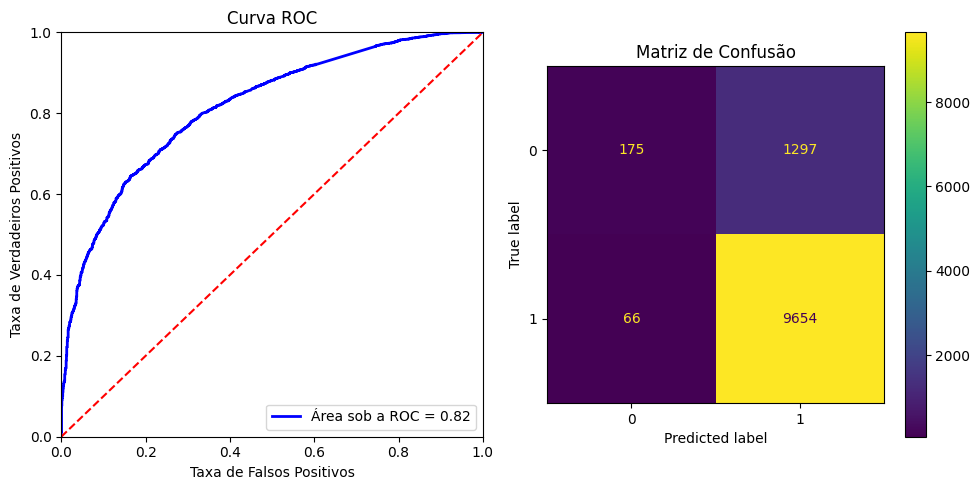

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.73      0.12      0.20      1472
           1       0.88      0.99      0.93      9720

    accuracy                           0.88     11192
   macro avg       0.80      0.56      0.57     11192
weighted avg       0.86      0.88      0.84     11192



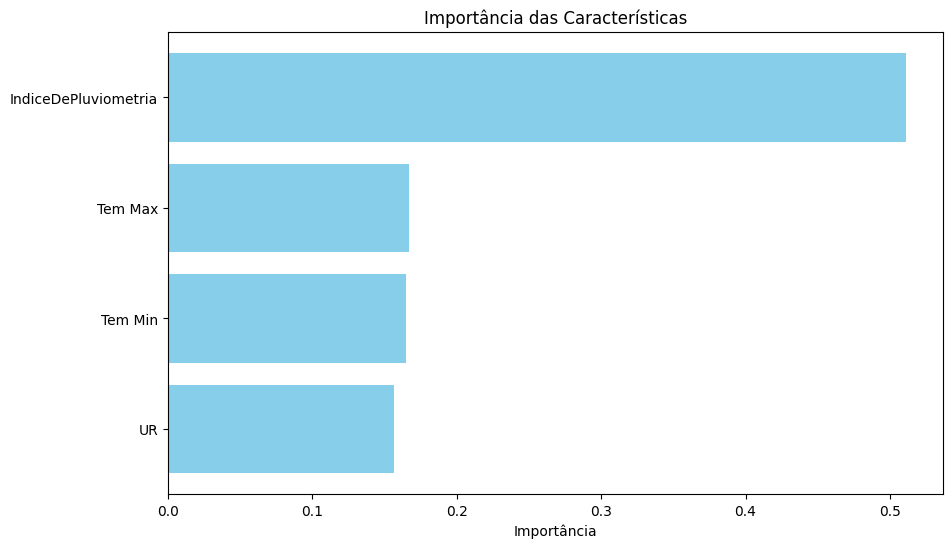

In [ ]:
y_pred_xgb = best_model_xgb.predict(X_test)
y_pred_proba_xgb = best_model_xgb.predict_proba(X_test)[:, 1]
threshold = 0.5  # Ajuste o threshold para algo mais moderado
y_pred_adjusted_xgb = (y_pred_proba_xgb >= threshold).astype(int)
# Executar as funções com os dados do modelo
plot_roc_and_confusion(y_test, y_pred_xgb, y_pred_proba_xgb, best_model_xgb)
display_classification_report(y_test, y_pred_xgb, best_model_xgb)
plot_feature_importance(best_model_xgb, X_train.columns)

# Conclusão
## O modelo escolhido será o LightGBM
### Selecionamos este modelo pensando no impacto de erros na previsão para o negócio. O LGBM, traz o melhor recall e menor índice de falsos positivos. Falsos positivos - dizer que terá interrupção de energia, e não ter - pode trazer um impacto operacional de deslocamento de equipe que pode ser mais prejudicial do que os falsos negativos.